# Scraping aci.aero

In [3]:
#=========================
#        SETTINGS
#=========================

startYear = 2007
endYear = 2017

#=========================
import requests
import urllib.request
import re
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd


#Initialize
pageNum = startYear
yearList = []
rankList = []
airportCodeList = []
cityNameList = []
passengerTotalList = []
changePercentList = []
count = 0 #For tracing progress

#Loop
while pageNum <= endYear:
    
    if pageNum == 2017:
        url = 'https://aci.aero/data-centre/annual-traffic-data/passengers/' + str(pageNum) + '-passenger-summary-annual-traffic-data/'
    else:
        url = 'https://aci.aero/data-centre/annual-traffic-data/passengers/' + str(pageNum) + '-final-summary/'
    

    #Loading the page
    hdr = {'User-Agent': 'Mozilla/5.0'}  #发送请求，假装浏览器
    req = Request(url,headers=hdr) #附加参数header header有很多参数，user-agent是其中一个
    page = urlopen(req)  #打开url 
    results = BeautifulSoup(page).find(class_="row-hover").find_all("tr")
    
    for result in results:
        tds = result.find_all("td")
        
        #Rank
        rank = tds[0].text.strip()
        
        #City Name and Airport Code
        position = tds[1].text.find("(")
        cityAndAirport = tds[1].text.strip()
        airportCode = cityAndAirport[position+1 : -1]
        cityName = cityAndAirport[0:position].strip()
        
        #Passenger
        passengerTotal = tds[2].text.replace(" ", "").replace(",", "").strip()

        #Change Percent
        changePercent = tds[-1].text.replace("%", "").strip()
        
        #Write into the lists
        yearList.append(pageNum)
        rankList.append(rank)
        airportCodeList.append(airportCode)
        cityNameList.append(cityName)
        passengerTotalList.append(passengerTotal)
        changePercentList.append(changePercent)
            
    #Next Year
    pageNum += 1
    
    #Tracing progress
    print("{:.0%}".format(count/(endYear-startYear)) + " finished.")
    count +=1
    
#Output CSV
total = dict(zip(['Year',
                  'Rank', 
                  'City Name', 
                  'Airport Code', 
                  'Total Passengers', 
                  '% Change'], 
                 [yearList, 
                  rankList, 
                  cityNameList, 
                  airportCodeList, 
                  passengerTotalList,
                  changePercentList]))
df = pd.DataFrame(total)
df.to_csv("TenYearPassengerSummary.csv", index=False)
print("Done!")

0% finished.
10% finished.
20% finished.
30% finished.
40% finished.
50% finished.
60% finished.
70% finished.
80% finished.
90% finished.
100% finished.
Done!


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
df = pd.read_csv('TenYearPassengerSummary.csv')

In [4]:
df.head()

,Year,Rank,City Name,Airport Code,Total Passengers,% Change
0,2007,1,ATLANTA GA,ATL,89379287,5.3
1,2007,2,CHICAGO IL,ORD,76177855,-0.1
2,2007,3,LONDON,LHR,68068304,0.8
3,2007,4,TOKYO,HND,66823414,1.1
4,2007,5,LOS ANGELES CA,LAX,61896075,1.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
Year                290 non-null int64
Rank                290 non-null int64
City Name           290 non-null object
Airport Code        290 non-null object
Total Passengers    290 non-null int64
% Change            290 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 13.7+ KB


In [6]:
df2007 = df[df.Year==2007]
df2007.head()

,Year,Rank,City Name,Airport Code,Total Passengers,% Change
0,2007,1,ATLANTA GA,ATL,89379287,5.3
1,2007,2,CHICAGO IL,ORD,76177855,-0.1
2,2007,3,LONDON,LHR,68068304,0.8
3,2007,4,TOKYO,HND,66823414,1.1
4,2007,5,LOS ANGELES CA,LAX,61896075,1.4


In [7]:
df2017 = df[df.Year==2017]
df2017.head()

,Year,Rank,City Name,Airport Code,Total Passengers,% Change
270,2017,1,"ATLANTA GA, US",ATL,103902992,-0.3
271,2017,2,"BEIJING, CN",PEK,95786442,1.5
272,2017,3,"DUBAI, AE",DXB,88242099,5.5
273,2017,4,"TOKYO, JP",HND,85408975,6.5
274,2017,5,"LOS ANGELES CA, US",LAX,84557968,4.5


In [8]:
df=df.pivot(index="Year", columns='Airport Code', values='Total Passengers')
df.head()

Airport Code,AMS,ATL,BKK,CAN,CDG,CGK,CLT,DEL,DEN,DFW,...,MSP,MUC,NRT,ORD,PEK,PHX,PVG,SFO,SIN,SYD
Year,,,,,,,,,,,,,,,,,,,,,
2007,47794994.0,89379287.0,41210081.0,NaN,59922177.0,NaN,33165688.0,NaN,49863352.0,59786476.0,...,35157322.0,33959422.0,35478146.0,76177855.0,53583664.0,42184515.0,NaN,35792707.0,36701556.0,NaN
2008,47430019.0,90039280.0,38603490.0,NaN,60874681.0,NaN,34739020.0,NaN,51245334.0,57093187.0,...,34056443.0,34530593.0,NaN,69353876.0,55937289.0,39891193.0,NaN,37234592.0,37694824.0,NaN
2009,43570370.0,88032086.0,40500224.0,37048712.0,57906866.0,37143719.0,34536666.0,NaN,50167485.0,56030457.0,...,NaN,32681067.0,NaN,64158343.0,65372012.0,37824982.0,NaN,37338942.0,37203978.0,33451383.0
2010,45211749.0,89331622.0,42784967.0,40975673.0,58167062.0,44355998.0,38254207.0,NaN,52209377.0,56906610.0,...,NaN,34721605.0,NaN,66774738.0,73948113.0,38554215.0,40578621.0,39253999.0,42038777.0,35991917.0
2011,49755252.0,92389023.0,47910904.0,45040340.0,60970551.0,51533187.0,39043708.0,NaN,52849132.0,57832495.0,...,NaN,37763701.0,NaN,66701241.0,78675058.0,40591948.0,41447730.0,40927786.0,46543845.0,NaN


In [9]:
airportsCodes = []
for code in df2017['Airport Code']:
    if len(airportsCodes)<10:
        
        if len(df2007[df2007['Airport Code']== code].index) !=0:
            airportsCodes.append(code)
        else:
            pass
    else:
        break

airportsCodes

#结果在2007，2017年都存在的机场

['ATL', 'PEK', 'DXB', 'HND', 'LAX', 'ORD', 'LHR', 'HKG', 'CDG', 'AMS']

In [10]:
df=df[airportsCodes].query('[2007,2017]in index') #做筛选
years = df.index.values.tolist() 

In [11]:
plt.savefig("PassengerTraffic.pdf", transparent=False)

<Figure size 432x288 with 0 Axes>

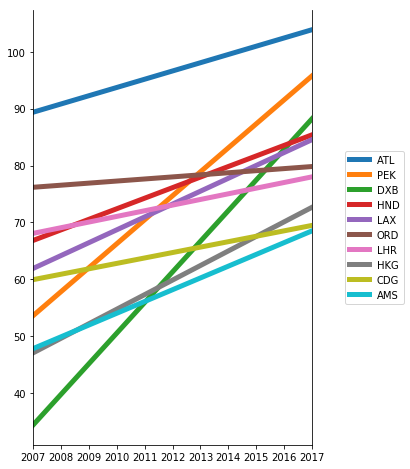

In [12]:
fig, ax = plt.subplots(figsize=(5, 8)) #figsize设置图的宽窄

for airportsCode in airportsCodes:
    ax.plot(years,df[airportsCode]/1000000, label = airportsCode, linewidth = 5)
    
    


#去除顶部横线
ax.spines['top'].set_visible(False)

#设置X轴的年份标记
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim([2007,2017]) #设置左右两条线，等于设置了x轴的出入点

#设置图例
labels = list(airportsCodes)
plt.legend(labels, loc='center left', bbox_to_anchor=(1.1,0,2,1)) #bbox是图例的相对位置


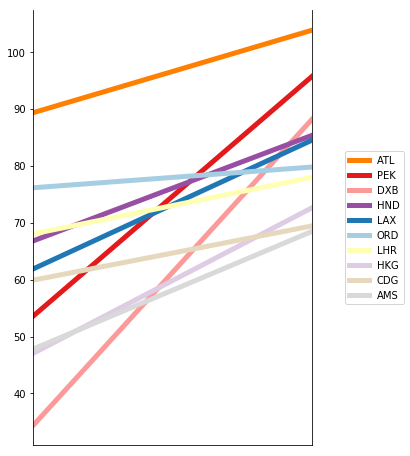

In [22]:
fig, ax = plt.subplots(figsize=(5, 8)) #figsize设置图的宽窄



colors = ['#ff7f00','#e31a1c','#fb9a99','#984ea3','#1f78b4','#a6cee3','#ffffb3','#decbe4','#e5d8bd','#d9d9d9']

for idx, airportsCode in enumerate(airportsCodes):
    ax.plot(years,df[airportsCode]/1000000, label = airportsCode, linewidth = 5,
            c = colors[idx])
    
    


#去除顶部横线
ax.spines['top'].set_visible(False)

#设置X轴的年份标记
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xlim([2007,2017]) #设置左右两条线，等于设置了x轴的出入点

#设置图例
labels = list(airportsCodes)
plt.legend(labels, loc='center left', bbox_to_anchor=(1.1,0,2,1)) #bbox是图例的相对位置

plt.savefig("PassengerTraffic.pdf", transparent=True,bbox_inches = 'tight')